In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
PLAYING_HOURS = 8
PLAYING_MINUTES = PLAYING_HOURS*60
INCOME_MULTIPLIER = 1.5
ROLLING_PRICE = 150
INCOME_PERIOD_MINUTES = 5

# could be full-table though (each item has each own distribution )

RARITY_DISTRIBUTION = [0.53, 0.25, 0.13, 0.06, 0.03]
CLASS_DISTRIBUTION = {"helmet": 0.2, "weapon": 0.1, "trinket": 0.35, "clothes": 0.15, "boots": 0.2}
QUALITY_MULTIPLIER = {"shitty": 0.6, "bad": 0.8, "normal": 1, "good": 1.2, "divine": 1.4}
QUALITY_DISTRIBUITION = {"shitty": 0.05, "bad": 0.2, "normal": 0.5, "good": 0.2, "divine": 0.05}

# health check
assert np.sum(RARITY_DISTRIBUTION) == 1
assert np.sum(list(CLASS_DISTRIBUTION.values())) == 1
assert np.sum(list(QUALITY_DISTRIBUITION.values())) == 1

POWER_DISTRIBUTION = {"helmet": [2, 3, 4, 5, 6],
                     "weapon": [4, 5, 6, 7, 8],
                     "trinket": [1,2, 3, 4, 5],
                     "clothes": [3, 4, 5, 6, 7],
                     "boots": [2, 3, 4, 5, 6]} 
character = {"helmet":0, "weapon": 0,"trinket": 0,"clothes": 0, "boots": 0} 

FINAL_TARGET = np.sum([i[-1] for i in list(POWER_DISTRIBUTION.values())])

INITIAL_BALANCE = 500
MINUTE_PER_STEP = 1

In [121]:
PLAYING_MINUTES

480

In [17]:
def null_character(character):
    for i in character:
        character[i] = 0

In [116]:
def roll(character):
    item = np.random.choice(list(CLASS_DISTRIBUTION.keys()), 1, p=list(CLASS_DISTRIBUTION.values()))[0]
    rarity = np.random.choice(np.arange(5), 1, p=RARITY_DISTRIBUTION)[0]
    quality = np.random.choice(list(QUALITY_DISTRIBUITION.keys()), 1, p=list(QUALITY_DISTRIBUITION.values()))[0]
    
    candidate = POWER_DISTRIBUTION[item][rarity] * QUALITY_MULTIPLIER[quality]
    if character[item] < candidate:
        character[item] = candidate

In [108]:
def return_power(character):
    return np.sum(list(character.values()))

In [118]:
def one_step(power_over_time, balance, current_time):
    if balance > ROLLING_PRICE:
        roll(character)
        balance -= ROLLING_PRICE
        
    power_over_time.append(return_power(character))
    
    current_time += MINUTE_PER_STEP
    
    if current_time%INCOME_PERIOD_MINUTES==0:
        balance += INCOME_MULTIPLIER*return_power(character)
    return power_over_time, balance, current_time  

In [119]:
power_over_time = []
balance = INITIAL_BALANCE
current_time = 0

while current_time < PLAYING_MINUTES or return_power(character) < FINAL_TARGET:
    power_over_time, balance, current_time = one_step(power_over_time, balance, current_time)

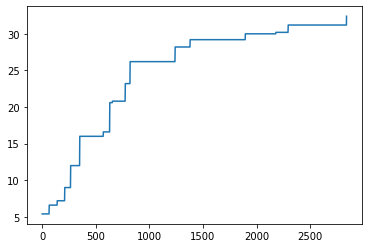

In [120]:
plt.plot(power_over_time)

In [122]:
character

{'helmet': 7.199999999999999,
 'weapon': 6,
 'trinket': 6.0,
 'clothes': 7.199999999999999,
 'boots': 6}